In [1]:
#import packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("brainaic.csv")

In [3]:
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Aliexpress may be a fine company, but...","Aliexpress is easy to work with, but they fulf...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla styleâ€¦,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont wasteâ€¦,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Reviewer     11997 non-null  object
 1   Country      11997 non-null  object
 2   StarRatings  12000 non-null  int64 
 3   Subject      12000 non-null  object
 4   Review       11161 non-null  object
 5   Date_posted  12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


In [5]:
#save relevant columns
reviews = data[["StarRatings", "Review"]]

In [6]:
reviews

,StarRatings,Review
0,3,"Aliexpress is easy to work with, but they fulf..."
1,5,I have been using AliExpress for well over a y...
2,5,"A good, customer-centric marketplace. But neve..."
3,1,I purchased an Android Tesla style radio.\nAft...
4,1,They are an absolute con job dont waste your m...
...,...,...
11995,5,I'm happy with the out come. Thank you
11996,5,Excellent quality
11997,1,I ordered 6 items from AliExpress and two sell...
11998,5,Great platform for doing business with vendors...


In [7]:
reviews.shape

(12000, 2)

In [8]:
#check the number of unique star ratings 
star_rating_counts = reviews['StarRatings'].value_counts()
star_rating_counts

1    6418
5    4488
2     412
4     402
3     280
Name: StarRatings, dtype: int64

In [9]:
#View missing values
reviews.isnull().sum()

StarRatings      0
Review         839
dtype: int64

In [10]:
#Investigate missing values
#save them first
missing = reviews[reviews["Review"].isna()]

In [11]:
missing

,StarRatings,Review
152,5,NaN
169,5,NaN
173,5,NaN
176,5,NaN
179,5,NaN
...,...,...
11976,5,NaN
11977,5,NaN
11982,5,NaN
11983,5,NaN


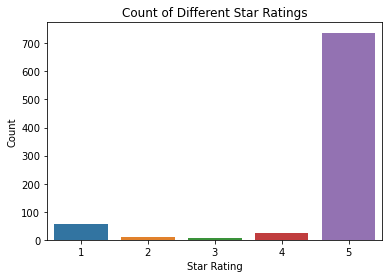

In [12]:
#histogram to see the count of ratings with missing values 

sns.countplot(data=missing, x='StarRatings')

plt.title('Count of Different Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# Show the plot
plt.show()

In [13]:
"""Majority of the reviews with no comments are positive, fall under rating 5"""

'Majority of the reviews with no comments are positive, fall under rating 5'

In [13]:
#replace empty cells for Review column with "No review"
reviews["Review"].fillna("No review", inplace = True)

In [14]:
reviews

,StarRatings,Review
0,3,"Aliexpress is easy to work with, but they fulf..."
1,5,I have been using AliExpress for well over a y...
2,5,"A good, customer-centric marketplace. But neve..."
3,1,I purchased an Android Tesla style radio.\nAft...
4,1,They are an absolute con job dont waste your m...
...,...,...
11995,5,I'm happy with the out come. Thank you
11996,5,Excellent quality
11997,1,I ordered 6 items from AliExpress and two sell...
11998,5,Great platform for doing business with vendors...


In [15]:
reviews.isnull().sum()

StarRatings    0
Review         0
dtype: int64

In [16]:
## Rank rating 0 - 1 (negative), 2-3 (neutral), 4-5(positive)
def categorize_rating(StarRatings):
    if  StarRatings >= 4:
        return "Positive"
    elif StarRatings  >= 2:
        return "Neutral"   
    else:
        return "Negative"

In [17]:
reviews["sentiment"] = reviews["StarRatings"].apply(categorize_rating)

In [18]:
reviews

,StarRatings,Review,sentiment
0,3,"Aliexpress is easy to work with, but they fulf...",Neutral
1,5,I have been using AliExpress for well over a y...,Positive
2,5,"A good, customer-centric marketplace. But neve...",Positive
3,1,I purchased an Android Tesla style radio.\nAft...,Negative
4,1,They are an absolute con job dont waste your m...,Negative
...,...,...,...
11995,5,I'm happy with the out come. Thank you,Positive
11996,5,Excellent quality,Positive
11997,1,I ordered 6 items from AliExpress and two sell...,Negative
11998,5,Great platform for doing business with vendors...,Positive


In [19]:
reviews["sentiment"].value_counts()

Negative    6418
Positive    4890
Neutral      692
Name: sentiment, dtype: int64

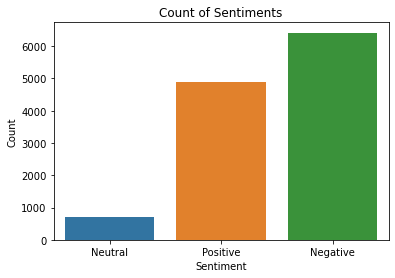

In [20]:
sns.countplot(data =reviews, x='sentiment')

plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

In [56]:
#The plot shows that about 50% of the reviews given are negative, 40% are positive and less than 10% are neutral

### Text cleaning
- Import relevant libraries and download stopwords from NLTK
- Define the stop words
- Define Function to clean the text
- Apply the cleaning function to the 'Review' column
- View the cleaned text

In [21]:
import re                                  # re - Regular Expression, useful for text cleaning (e.g., removing special characters).
import nltk                                # nltk - Natural Language Toolkit, a library used for natural language processing tasks like tokenization and stopword removal.
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chinuambajekwe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Define Function to clean text 

In [22]:
# Define a variable that stores stopwords
stop_words = set(stopwords.words("english"))

In [23]:
def clean_text(text):
    # Remove special characters and numbers, keeping only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)                                              # This regex matches anything that is not a letter or space and replaces it with an empty string
    # Convert text to lowercase to ensure uniformity
    text = text.lower()                                                                  # This helps in reducing the complexity of the analysis by treating 'Word' and 'word' as the same
    # Remove extra spaces between words
    text = re.sub(r'\s+', ' ', text).strip()                                             # This replaces multiple spaces with a single space and trims leading/trailing spaces
    # Remove stop words (common words that may not add significant meaning to the text)
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text


In [24]:
#Apply the function to the review column 
reviews["Review_cleaned"]=reviews["Review"].apply(clean_text)

In [61]:
reviews

,StarRatings,Review,sentiment,Review_cleaned
0,3,"Aliexpress is easy to work with, but they fulf...",Neutral,aliexpress easy work fulfill orders via rd par...
1,5,I have been using AliExpress for well over a y...,Positive,using aliexpress well year consistently impres...
2,5,"A good, customer-centric marketplace. But neve...",Positive,good customercentric marketplace nevertheless ...
3,1,I purchased an Android Tesla style radio.\nAft...,Negative,purchased android tesla style radio installed ...
4,1,They are an absolute con job dont waste your m...,Negative,absolute con job dont waste money scammers rec...
...,...,...,...,...
11995,5,I'm happy with the out come. Thank you,Positive,im happy come thank
11996,5,Excellent quality,Positive,excellent quality
11997,1,I ordered 6 items from AliExpress and two sell...,Negative,ordered items aliexpress two sellers cancelled...
11998,5,Great platform for doing business with vendors...,Positive,great platform business vendors would never ab...


## Tokenization - Initialize tokens which breaks down sentences into words

In [25]:
# Import tokenize libraries and download punkt from NLTK
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chinuambajekwe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
sample_text= reviews["Review_cleaned"].iloc[20]

In [27]:
token = word_tokenize(sample_text)

In [28]:
token

['bought',
 'lighting',
 'zimulongflagship',
 'aliexpress',
 'received',
 'half',
 'product',
 'trying',
 'communicate',
 'ever',
 'since',
 'impossible',
 'also',
 'soolala',
 'ordered',
 'glasses',
 'never',
 'arrived',
 'never',
 'received',
 'refund',
 'avoid',
 'company']

In [29]:
#apply the tokenize function to review_cleaned column 
reviews["Review_tokens"] = reviews["Review_cleaned"].apply(word_tokenize)

In [30]:
reviews

,StarRatings,Review,sentiment,Review_cleaned,Review_tokens
0,3,"Aliexpress is easy to work with, but they fulf...",Neutral,aliexpress easy work fulfill orders via rd par...,"[aliexpress, easy, work, fulfill, orders, via,..."
1,5,I have been using AliExpress for well over a y...,Positive,using aliexpress well year consistently impres...,"[using, aliexpress, well, year, consistently, ..."
2,5,"A good, customer-centric marketplace. But neve...",Positive,good customercentric marketplace nevertheless ...,"[good, customercentric, marketplace, neverthel..."
3,1,I purchased an Android Tesla style radio.\nAft...,Negative,purchased android tesla style radio installed ...,"[purchased, android, tesla, style, radio, inst..."
4,1,They are an absolute con job dont waste your m...,Negative,absolute con job dont waste money scammers rec...,"[absolute, con, job, dont, waste, money, scamm..."
...,...,...,...,...,...
11995,5,I'm happy with the out come. Thank you,Positive,im happy come thank,"[im, happy, come, thank]"
11996,5,Excellent quality,Positive,excellent quality,"[excellent, quality]"
11997,1,I ordered 6 items from AliExpress and two sell...,Negative,ordered items aliexpress two sellers cancelled...,"[ordered, items, aliexpress, two, sellers, can..."
11998,5,Great platform for doing business with vendors...,Positive,great platform business vendors would never ab...,"[great, platform, business, vendors, would, ne..."


### 3. Feature Engineering
- Bag of Words Vectors (BoW)
- TF-IDF - Term Frequency-Inverse Document Frequency
- Data Splitting

`Bag of Words Vectors (BoW): Convert text into a matrix of token counts using CountVectorizer from sklearn.`
- Import the relevant libraries
- Initialize the CountVectorizer (BoW)
- Apply BoW to the 'Cleaned_Feedback_translated' column
- Check the shape of the BoW feature matrix

In [42]:
# import the relevant libraries
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
# Initialize the CountVectorizer (BoW)
bow_vectorizer = CountVectorizer()

In [44]:
# Apply BoW to the 'Cleaned Review' column
bow_matrix = bow_vectorizer.fit_transform(reviews["Review_cleaned"])

In [45]:
# Check the shape of the BoW feature matrix
bow_matrix.shape

(12000, 21488)

`TF-IDF - Term Frequency-Inverse Document Frequency: Use TfidfVectorizer to account for word frequency while downweighting common words that appear in many feedback reviews.`
- Import the relevant libraries
- Initialize the TfidfVectorizer
- Apply TF-IDF to the 'Cleaned_Feedback_translated' column
- Check the shape of the TF-IDF feature matrix

In [46]:
# Import the relevant libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [48]:
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews["Review_cleaned"])

In [49]:
# Check the shape of the TF-IDF feature matrix
tfidf_matrix.shape  

(12000, 21488)

In [79]:
## Splitting the data into test and training set

In [50]:
from sklearn.model_selection import train_test_split

In [62]:
# BoW Train-Test Split
X_train_bow,X_test_bow,y_train,y_test = train_test_split(bow_matrix, reviews["sentiment"], 
                                                                 test_size = 0.2, random_state = 42)

In [63]:
## TF-IDF Train-Test Split
X_train_tfidf,X_test_tfidf,y_train,y_test = train_test_split(tfidf_matrix, reviews["sentiment"], 
                                                                 test_size = 0.2, random_state = 42)

### 4. Model Building 

`Pre-trained VADER Model` - `VADER: Valence Aware Dictionary and sentiment Reasoner is a pre-trained sentiment analysis tool designed to analyze text for sentiment polarity and intensity, particularly effective for social media and short texts. It uses a lexicon of sentiment related words and rules to score and classify text as positive, negative, or neutral.`
- Import relevant Libraries and download 'vader_lexicon' from NLTK
- Initialize the VADER sentiment analyzer
- Create a Function to calculate sentiment score using VADER
- Apply VADER sentiment analysis to the Cleaned_Feedback_translated column

In [64]:
# Import relevant Libraries and download 'vader_lexicon' from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chinuambajekwe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
# Initialize the VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [66]:
text = "I hate winter"

In [67]:
vader_analyzer.polarity_scores(text)

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [87]:
# Create a Function to calculate sentiment score using VADER
def vader_sentiment(text):
    # Get VADER compound score
    sentiment_score = vader_analyzer.polarity_scores(text)['compound']
    
    # Map compound score to 3 rating categories
    if sentiment_score <= -0.02:
        return "Negative"
    elif sentiment_score <= 0.02:
        return "Neutral"
    else:
        return "Positive"

In [88]:
# Apply VADER sentiment scores to the cleaned review  column
reviews["vader_sentiment"] = reviews["Review_cleaned"].apply(vader_sentiment)

In [89]:
reviews

,StarRatings,Review,sentiment,Review_cleaned,Review_tokens,vader_sentiment
0,3,"Aliexpress is easy to work with, but they fulf...",Neutral,aliexpress easy work fulfill orders via rd par...,"[aliexpress, easy, work, fulfill, orders, via,...",Positive
1,5,I have been using AliExpress for well over a y...,Positive,using aliexpress well year consistently impres...,"[using, aliexpress, well, year, consistently, ...",Positive
2,5,"A good, customer-centric marketplace. But neve...",Positive,good customercentric marketplace nevertheless ...,"[good, customercentric, marketplace, neverthel...",Positive
3,1,I purchased an Android Tesla style radio.\nAft...,Negative,purchased android tesla style radio installed ...,"[purchased, android, tesla, style, radio, inst...",Positive
4,1,They are an absolute con job dont waste your m...,Negative,absolute con job dont waste money scammers rec...,"[absolute, con, job, dont, waste, money, scamm...",Positive
...,...,...,...,...,...,...
11995,5,I'm happy with the out come. Thank you,Positive,im happy come thank,"[im, happy, come, thank]",Positive
11996,5,Excellent quality,Positive,excellent quality,"[excellent, quality]",Positive
11997,1,I ordered 6 items from AliExpress and two sell...,Negative,ordered items aliexpress two sellers cancelled...,"[ordered, items, aliexpress, two, sellers, can...",Negative
11998,5,Great platform for doing business with vendors...,Positive,great platform business vendors would never ab...,"[great, platform, business, vendors, would, ne...",Positive


In [86]:
reviews["vader_sentiment"].value_counts()

Positive    5525
Negative    4722
Neutral     1753
Name: vader_sentiment, dtype: int64

`Custom Models`:
`Naive Bayes Model` - preferred for sentiment analysis due to its simplicity, speed, and effectiveness in handling high-dimensional text data, like BoW or TF-IDF features.
- Import relevant Libraries
- Initialize and Train the Naive Bayes model (BoW and TF-IDF)
- Make predictions on the test set (BoW and TF-IDF)
- Transform the cleaned feedback translated into numerical feature representations: Bag of Words format using fitted CountVectorizer and TF-IDF format using fitted TfidfVectorizer.
- Predict sentiments using the Naive Bayes model for both Bag of Words and TF-IDF features, and update the Cleaned_ecomm_review DataFrame with the new sentiment predictions in 'BoW' and 'TF-IDF' columns. 

In [90]:
# Import relevant Libraries
from sklearn.naive_bayes import MultinomialNB

In [92]:
# Initialize and Train the Naive Bayes model on BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

# Make predictions on the test set (BoW)
y_pred_bow = nb_bow.predict(X_test_bow)

In [93]:
# Initialize and Train the Naive Bayes model on TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set (TF-IDF)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# 5. Model Evaluation:
- Assess model performance using accuracy and F1 score metrics.
- Optionally, conduct hyperparameter tuning for improved performance.

In [94]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [95]:
# Evaluate VADER Model Prediction
print("Evaluation for VADER")
vader_classification_report = classification_report(reviews['sentiment'],reviews['vader_sentiment'])
print("VADER Classification Report:")
print(vader_classification_report)
vader_accuracy = accuracy_score(reviews['sentiment'],reviews['vader_sentiment']) * 100
vader_f1 = f1_score(reviews['sentiment'], reviews['vader_sentiment'], average='weighted') * 100


Evaluation for VADER
VADER Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.66      0.75      6418
     Neutral       0.03      0.07      0.04       692
    Positive       0.63      0.73      0.68      4890

    accuracy                           0.65     12000
   macro avg       0.51      0.48      0.49     12000
weighted avg       0.72      0.65      0.68     12000



In [97]:
# Evaluate Naive Bayes (BoW) Model
print("Evaluation for Naive Bayes (BoW)")
print("Classification Report (BoW):")
print(classification_report(y_test, y_pred_bow))
bow_accuracy = (accuracy_score(y_test, y_pred_bow)) * 100 
bow_f1 = (f1_score(y_test, y_pred_bow, average='weighted')) * 100


Evaluation for Naive Bayes (BoW)
Classification Report (BoW):
              precision    recall  f1-score   support

    Negative       0.87      0.94      0.90      1275
     Neutral       0.09      0.02      0.03       147
    Positive       0.90      0.91      0.91       978

    accuracy                           0.87      2400
   macro avg       0.62      0.62      0.61      2400
weighted avg       0.83      0.87      0.85      2400



In [98]:
# Evaluate Naive Bayes (TF-IDF) Model
print("Evaluation for Naive Bayes (TF-IDF):")
print("Classification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))
tfidf_accuracy = (accuracy_score(y_test, y_pred_tfidf)) * 100  # Calculate accuracy
tfidf_f1 = (f1_score(y_test, y_pred_tfidf, average='weighted')) * 100  # Calculate F1 score

Evaluation for Naive Bayes (TF-IDF):
Classification Report (TF-IDF):
              precision    recall  f1-score   support

    Negative       0.79      0.98      0.87      1275
     Neutral       0.00      0.00      0.00       147
    Positive       0.94      0.79      0.86       978

    accuracy                           0.84      2400
   macro avg       0.58      0.59      0.58      2400
weighted avg       0.80      0.84      0.81      2400



In [99]:
# Create a DataFrame to consolidate the evaluation metrics (accuracy and F1 score) for the three models: (VADER, Naive Bayes with BoW, and Naive Bayes with TF-IDF).
# Create a dictionary with the model names and their corresponding accuracy and F1 scores
evaluation_metrics = {
    'Model': ['VADER', 'Naive Bayes (BoW)', 'Naive Bayes (TF-IDF)'],
    'Accuracy': [vader_accuracy, bow_accuracy, tfidf_accuracy],
    'F1 Score': [vader_f1, bow_f1, tfidf_f1]
}

# Convert the dictionary into a DataFrame
evaluation_data = pd.DataFrame(evaluation_metrics)

# Define a function to format the numbers as percentages
def format_percentage(value):
    return f'{value:.2f}%'

# Use apply with the custom function for both columns
evaluation_data['Accuracy'] = evaluation_data['Accuracy'].apply(format_percentage)
evaluation_data['F1 Score'] = evaluation_data['F1 Score'].apply(format_percentage)

# print output
evaluation_data

,Model,Accuracy,F1 Score
0,VADER,65.40%,67.96%
1,Naive Bayes (BoW),87.08%,85.02%
2,Naive Bayes (TF-IDF),84.04%,81.32%


In [ ]:
"""The table above shows that Naive Bayes Model using Bag of Words vectorization produces the highest 
accuracy in classifying text reviews. It performs particulary well for negative and positive reviews, with
scores of 90 and 91% respectively. This is expected as the dataset contains a high number of both positive
and negative reviews """ 

""""The performance of Vader, the pre-trained model is the lowest for both text classes and this is expected as
the model is suited for short text blocks rather than long ones"""

"""All models struggle with classifying neutral reviews due to class imbalance and inadquate number of reviews
in the neutral class
"""

## Try other models and compare performance 
-  Logistic Regression
-  XG-BOOST


In [100]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [114]:
#Encode sentiment column using Label encoder
from sklearn.preprocessing import LabelEncoder

# Encode Sentiment using labelEncoder (binary encoding for Positive, Negative, Neutral)
encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
reviews["Sentiment_Encoded"] = encoder.fit_transform(reviews["sentiment"])

reviews["Sentiment_Encoded"].value_counts()

0    6418
2    4890
1     692
Name: Sentiment_Encoded, dtype: int64

In [115]:
### reviews , neutral - 1, positive - 2, negative , 0

,StarRatings,Review,sentiment,Review_cleaned,Review_tokens,vader_sentiment,Sentiment_Encoded
0,3,"Aliexpress is easy to work with, but they fulf...",Neutral,aliexpress easy work fulfill orders via rd par...,"[aliexpress, easy, work, fulfill, orders, via,...",Positive,1
1,5,I have been using AliExpress for well over a y...,Positive,using aliexpress well year consistently impres...,"[using, aliexpress, well, year, consistently, ...",Positive,2
2,5,"A good, customer-centric marketplace. But neve...",Positive,good customercentric marketplace nevertheless ...,"[good, customercentric, marketplace, neverthel...",Positive,2
3,1,I purchased an Android Tesla style radio.\nAft...,Negative,purchased android tesla style radio installed ...,"[purchased, android, tesla, style, radio, inst...",Positive,0
4,1,They are an absolute con job dont waste your m...,Negative,absolute con job dont waste money scammers rec...,"[absolute, con, job, dont, waste, money, scamm...",Positive,0
...,...,...,...,...,...,...,...
11995,5,I'm happy with the out come. Thank you,Positive,im happy come thank,"[im, happy, come, thank]",Positive,2
11996,5,Excellent quality,Positive,excellent quality,"[excellent, quality]",Positive,2
11997,1,I ordered 6 items from AliExpress and two sell...,Negative,ordered items aliexpress two sellers cancelled...,"[ordered, items, aliexpress, two, sellers, can...",Negative,0
11998,5,Great platform for doing business with vendors...,Positive,great platform business vendors would never ab...,"[great, platform, business, vendors, would, ne...",Positive,2


In [116]:
##split the data again

# BoW Train-Test Split
X_train_bow,X_test_bow,y_train,y_test = train_test_split(bow_matrix, reviews["Sentiment_Encoded"], 
                                                                 test_size = 0.2, random_state = 42)

In [117]:
## TF-IDF Train-Test Split
X_train_tfidf,X_test_tfidf,y_train,y_test = train_test_split(tfidf_matrix, reviews["Sentiment_Encoded"], 
                                                                 test_size = 0.2, random_state = 42)

In [118]:
# Initialize, Train, and Predict the Logistic Regression model on BoW
log_bow = LogisticRegression()                    # Intialize
log_bow.fit(X_train_bow, y_train)                                        # Train
log_y_pred_bow = log_bow.predict(X_test_bow)                             # Predict

In [119]:
# Initialize, Train, and Predict the Logistic Regression model on TF-IDF
log_tfidf = LogisticRegression()                  # Initialize
log_tfidf.fit(X_train_tfidf, y_train)                                    # Train
log_y_pred_tfidf = log_tfidf.predict(X_test_tfidf)                       # Predict

In [120]:
# Initialize for XGBoost Model
xgb_bow = xgb.XGBClassifier()
xgb_tfidf = xgb.XGBClassifier()

In [121]:
# Train and Predict the XGBoost model on BoW
xgb_bow.fit(X_train_bow, y_train)                                       # Train
xgb_y_pred_bow = xgb_bow.predict(X_test_bow)                            # Predict

In [123]:
# Train and Predict the XGBoost model on TF-IDF
xgb_tfidf.fit(X_train_tfidf, y_train)                                   # Train
xgb_y_pred_tfidf = xgb_tfidf.predict(X_test_tfidf)                      # Predict

In [126]:
# Logistic Regression (BoW) Model
print("Evaluation for Logistic Regression (BoW):")
print("Classification Report (BoW):")
print(classification_report(y_test, log_y_pred_bow))
log_bow_accuracy = (accuracy_score(y_test, log_y_pred_bow)) * 100 
log_bow_f1 = (f1_score(y_test, log_y_pred_bow, average='weighted')) * 100

# Logistic Regression (TF-IDF) Model
print("Evaluation for Logistic Regression (TF-IDF):")
print("Classification Report (TF-IDF):")
print(classification_report(y_test, log_y_pred_tfidf))
log_tfidf_accuracy = (accuracy_score(y_test, log_y_pred_tfidf)) * 100  # Calculate accuracy
log_tfidf_f1 = (f1_score(y_test, log_y_pred_tfidf, average='weighted')) * 100  # Calculate F1 score

# XGBoost (BoW) Model
print("Evaluation for XGBoost (BoW):")
print("Classification Report (BoW):")
print(classification_report(y_test, xgb_y_pred_bow))
xgb_bow_accuracy = (accuracy_score(y_test, xgb_y_pred_bow)) * 100 
xgb_bow_f1 = (f1_score(y_test, xgb_y_pred_bow, average='weighted')) * 100

# XGBoost (TF-IDF) Model
print("Evaluation for XGBoost (TF-IDF):")
print("Classification Report (TF-IDF):")
print(classification_report(y_test, xgb_y_pred_tfidf))
xgb_tfidf_accuracy = (accuracy_score(y_test, xgb_y_pred_tfidf)) * 100  # Calculate accuracy
xgb_tfidf_f1 = (f1_score(y_test, xgb_y_pred_tfidf, average='weighted')) * 100  # Calculate F1 score

# Create a DataFrame to consolidate the evaluation metrics (accuracy and F1 score) for the three models: (VADER, Naive Bayes with BoW, and Naive Bayes with TF-IDF).
# Create a dictionary with the model names and their corresponding accuracy and F1 scores
evaluation_metrics1 = {
    'Model': ['VADER', 'Naive Bayes (BoW)', 'Naive Bayes (TF-IDF)', 'Logistic Regression (BoW)', 'Logistic Regression (TF-IDF)', 'XGBoost (BoW)', 'XGBoost (TF-IDF)'],
    'Accuracy': [vader_accuracy, bow_accuracy, tfidf_accuracy, log_bow_accuracy, log_tfidf_accuracy, xgb_bow_accuracy, xgb_tfidf_accuracy],
    'F1 Score': [vader_f1, bow_f1, tfidf_f1, log_bow_f1, log_tfidf_f1, xgb_bow_f1, xgb_tfidf_f1]
}

# Convert the dictionary into a DataFrame
evaluation_data1 = pd.DataFrame(evaluation_metrics1)

# Define a function to format the numbers as percentages
def format_percentage(value):
    return f'{value:.2f}%'

# Use apply with the custom function for both columns
evaluation_data1['Accuracy'] = evaluation_data1['Accuracy'].apply(format_percentage)
evaluation_data1['F1 Score'] = evaluation_data1['F1 Score'].apply(format_percentage)

# print output
evaluation_data1


Evaluation for Logistic Regression (BoW):
Classification Report (BoW):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1275
           1       0.23      0.12      0.15       147
           2       0.88      0.94      0.91       978

    accuracy                           0.87      2400
   macro avg       0.67      0.65      0.66      2400
weighted avg       0.85      0.87      0.86      2400

Evaluation for Logistic Regression (TF-IDF):
Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1275
           1       0.57      0.03      0.05       147
           2       0.90      0.93      0.92       978

    accuracy                           0.89      2400
   macro avg       0.78      0.64      0.63      2400
weighted avg       0.87      0.89      0.86      2400

Evaluation for XGBoost (BoW):
Classification Report (BoW):
              precision    reca

,Model,Accuracy,F1 Score
0,VADER,65.40%,67.96%
1,Naive Bayes (BoW),87.08%,85.02%
2,Naive Bayes (TF-IDF),84.04%,81.32%
3,Logistic Regression (BoW),87.21%,86.04%
4,Logistic Regression (TF-IDF),88.88%,86.35%
5,XGBoost (BoW),86.96%,84.67%
6,XGBoost (TF-IDF),87.38%,84.98%


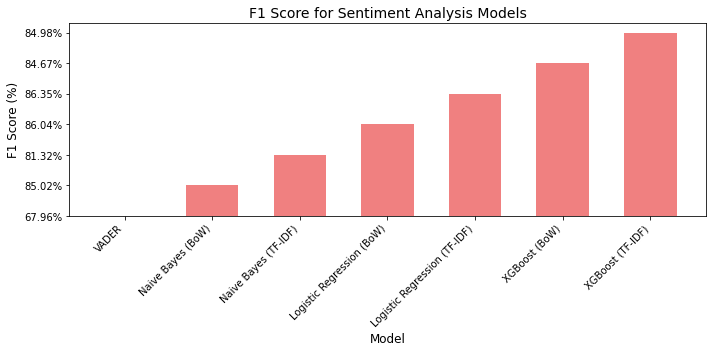

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 5))

# Define the positions for each model on the x-axis
x_positions = np.arange(len(evaluation_data1['Model']))

# Create a bar chart for F1 Score
plt.bar(x_positions, evaluation_data1['F1 Score'], color='lightcoral', width=0.6)

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Score (%)', fontsize=12)
plt.title('F1 Score for Sentiment Analysis Models', fontsize=14)
plt.xticks(x_positions, evaluation_data1['Model'], rotation=45, ha='right', fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()